In [1]:
# Imported Libraries 
import pandas as pd 
import urllib
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319', '#242482']
default_cycler = cycler(color= 'r''b')
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

In [2]:
# HTTP request for data 1

df = pd.read_csv('flake2-1_50x_514nm_10p_10s5x.csv')
y = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   764.954590
1     1.699705   798.421387
2     1.699770   659.659058
3     1.699834   874.613770
4     1.699899   616.424255
...        ...          ...
4978  2.199091  2475.435303
4979  2.199239  2481.336670
4980  2.199385  2476.696777
4981  2.199533  2480.488281
4982  2.199680  2515.885010

[4983 rows x 2 columns]


In [77]:
WN = y[:,0]
I = y[:,1]/ 1e2

#print(WN)
#print(I)

print(np.max(WN))
print(np.min(WN))
print(np.max(I))

2.19968
1.69964
606.4477734


Text(0.5, 1.0, 'MoS2')

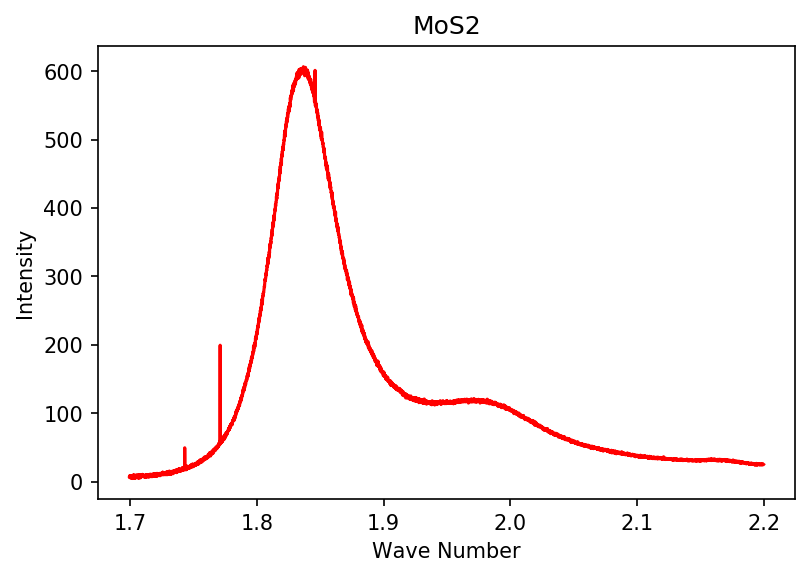

In [4]:

plt.plot(WN,I)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

# Full Signal fit

In [106]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


def func(x1, *params ):
    y = np.zeros_like(x1)
    for i in range(0, len(params), 3):
        b = params[i]
        a = params[i+1]
        c = params[i+2]
        y = a*(1/(c*np.sqrt(2*np.pi)))*np.exp(-np.power(x1 - b, 2)/(2*np.power(c, 2)))
    return y

guess = [1.69, 764, 2.5, 2.19, 2515, 2.5]
for i in range(4983):
    guess += [1.69+2.19*i, 300, 2.5]   

x1 = WN
y1 = I

y = np.zeros_like(x1)

popt, cov = curve_fit(f=func, xdata=WN, ydata=I, p0=guess, bounds=(-np.inf, np.inf),maxfev = 100000)
fit = func(x1, *popt)
#stdevs = np.sqrt(np.diag(cov))

#popt, pcov = curve_fit(func, x1, y, p0=guess, bounds=(-np.inf, np.inf),maxfev = 100000)
#print(popt)
#fit = func(x1, *popt)



#plt.plot(WN, I)
#plt.plot(WN, fit , 'r-')
plt.plot(WN, I, "bo")
plt.plot(WN, fit, linestyle='--', linewidth=2, color='black')
plt.show()

TypeError: Improper input: N=14955 must not exceed M=4983

## Partial Peak Fitting

In [45]:
from scipy.optimize import curve_fit
# Function to calculate the Gaussian with constants a, b, and c
def gaussian(x, a, b, c):
    return a*(1/(c*np.sqrt(2*np.pi)))*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

In [46]:
x_array = np.linspace(1.6,2.2,100)

amp1 = 2.2
sigma1 = .25
cen1 = 1.85
y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

# creating some noise to add the the y-axis data
## Why?
y_noise_gauss = (np.exp((np.random.ranf(100))))/5
#y_array_gauss = y_noise_gauss # here you overwrite y_array_gauss 

print(np.min(y_array_gauss))
print(np.max(y_array_gauss))


1.3176016975945541
3.5106275926046013


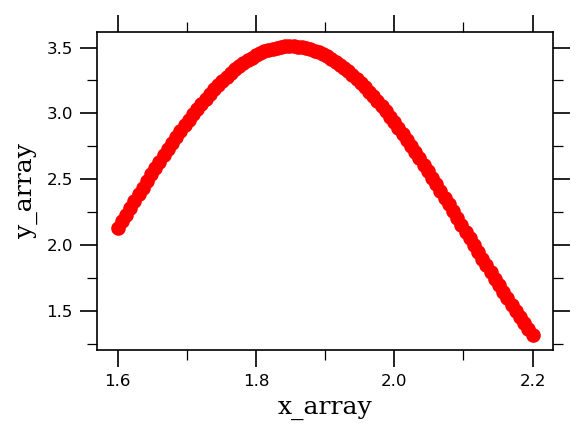

In [47]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")

#ax1.set_xlim(1.5,2.3)
#ax1.set_ylim(.19,.54 )

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(.2))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)

In [68]:
print(np.where(WN>1.9)[0][0])
print(np.where(WN>2.19)[0][0])
print(WN[1376])
print(WN[1375])

print(WN[2495])

print(len(WN))

2495
4916
1.800034
1.799952
1.9000709999999998
4983


[61.46650009  1.84171522  0.16602189]
[1.41344645 0.00415743 0.00211487]


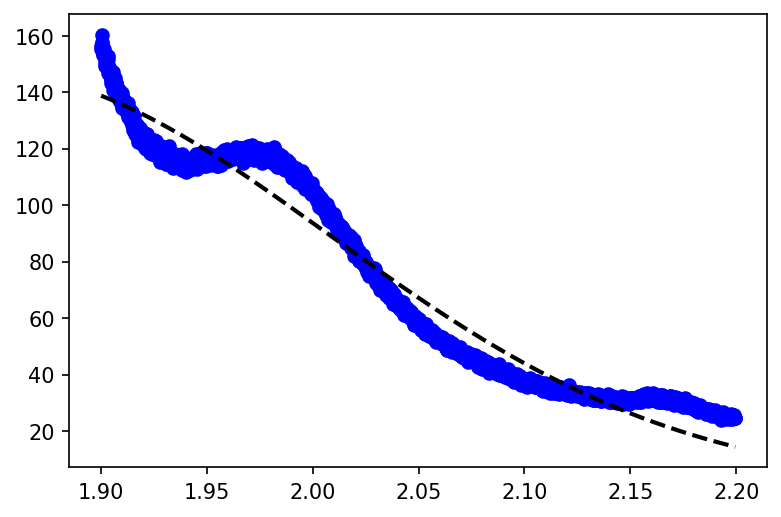

In [76]:
#p0 = scale, center, width

pars, cov = curve_fit(f=gaussian, xdata=WN[2495:4982], ydata=I[2495:4982], p0=[1, 10.0, 2.5], bounds=(-np.inf, np.inf),maxfev = 2000)
stdevs = np.sqrt(np.diag(cov))

pars, cov = curve_fit(f=gaussian, xdata=WN[2495:4982], ydata=I[2495:4982], p0=[1, 10.0, 2.5], bounds=(-np.inf, np.inf),maxfev = 2000)
stdevs = np.sqrt(np.diag(cov))

plt.plot(WN[2495:4982], I[2495:4982], "bo")
plt.plot(WN[2495:4982], gaussian(WN[2495:4982], *pars), linestyle='--', linewidth=2, color='black')

print(pars)
print(stdevs)

[4.55422024e+01 1.84078328e+00 3.30857322e-02]
[2.30243717e-01 1.93331702e-04 1.92778857e-04]


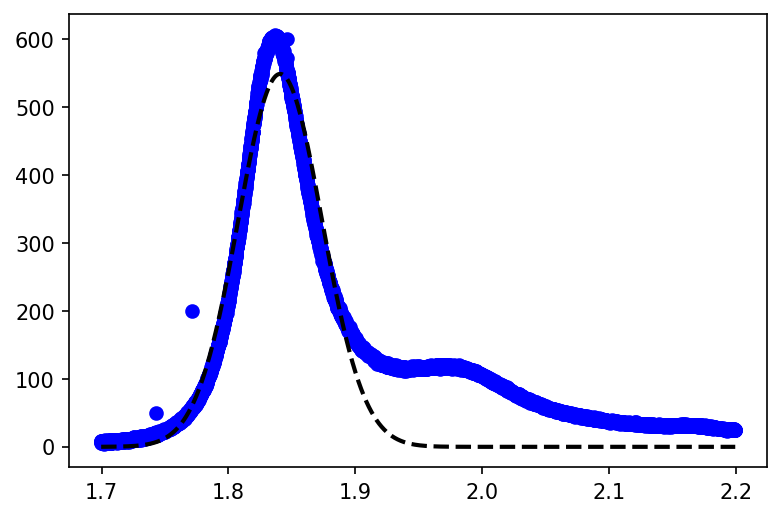

In [65]:

#p0 = scale, center, width

pars, cov = curve_fit(f=gaussian, xdata=WN[1:4982], ydata=I[1:4982], p0=[5, 1.5, 2.5], bounds=(-np.inf, np.inf),maxfev = 2000)
stdevs = np.sqrt(np.diag(cov))

pars, cov = curve_fit(f=gaussian, xdata=WN[1:4982], ydata=I[1:4982], p0=[100, 1.5, 2.5], bounds=(-np.inf, np.inf),maxfev = 2000)
stdevs = np.sqrt(np.diag(cov))

plt.plot(WN[1:4982], I[1:4982], "bo")
plt.plot(WN[1:4982], gaussian(WN[1:4982], *pars), linestyle='--', linewidth=2, color='black')

print(pars)
print(stdevs)

## Tester

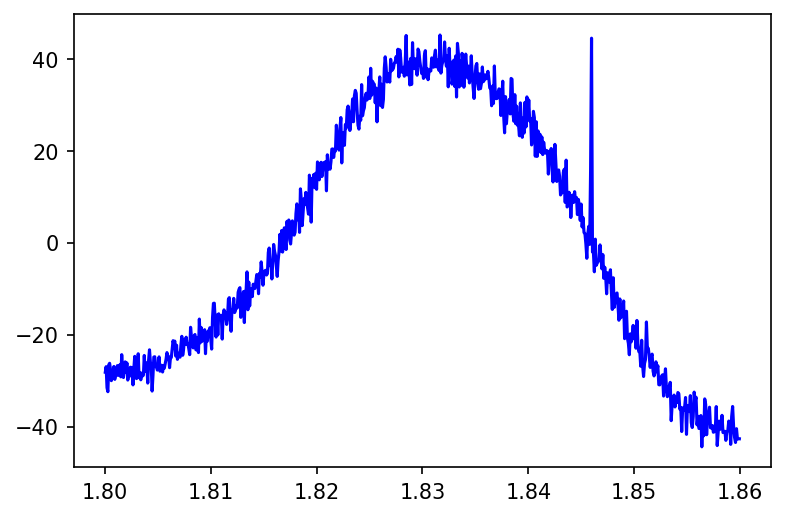

In [59]:
res = I[1:2071] - gaussian(WN[1:2071], *pars)
plt.plot(WN[1:2071], res,color='b')


## Larger Values

In [20]:
x_data = np.linspace(1,600,50)

amp2 = 600
sigma2 = 25
cen2 = 300
sigmaW = 30

y_noise_gauss = np.random.randn(0, sigmaW, 100)

y_array = amp2*(np.exp((-1.0/2.0)*(((x_data-cen2)/sigma2)**2))) 
#y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))


# creating some noise to add the the y-axis data
y_noise_gauss = np.random.randn(0, sigmaW, 100)


#print(np.min(y_array_gauss))
#print(np.max(y_array_gauss))
#print(y_array_gauss)

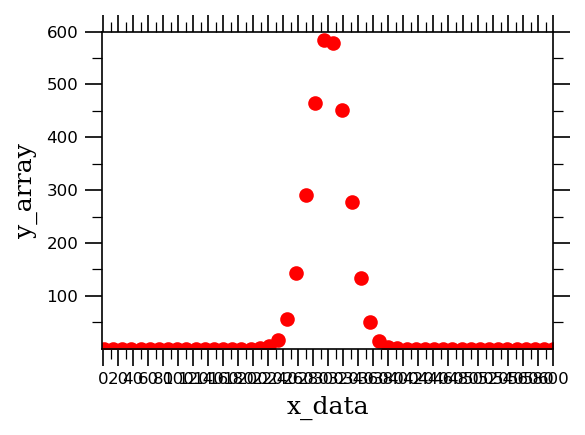

In [21]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_data, y_array, "ro")

ax1.set_xlim(-1.2,600)
ax1.set_ylim(.2,600 )

ax1.set_xlabel("x_data",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)

[2.28626443e-14 1.09997951e-15 1.09997950e-15]


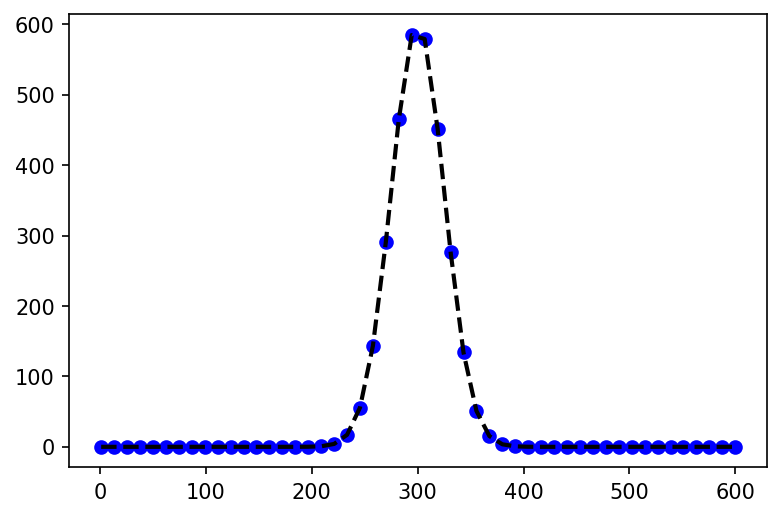

In [31]:
pars, cov = curve_fit(f=gaussian, xdata=x_data, ydata=y_array, p0=[5, 1.2, 600], bounds=(-np.inf, np.inf))
stdevs = np.sqrt(np.diag(cov))
plt.plot(x_data, y_array, "bo")
plt.plot(x_data, gaussian(x_data, *pars), linestyle='--', linewidth=2, color='black')

print(stdevs)

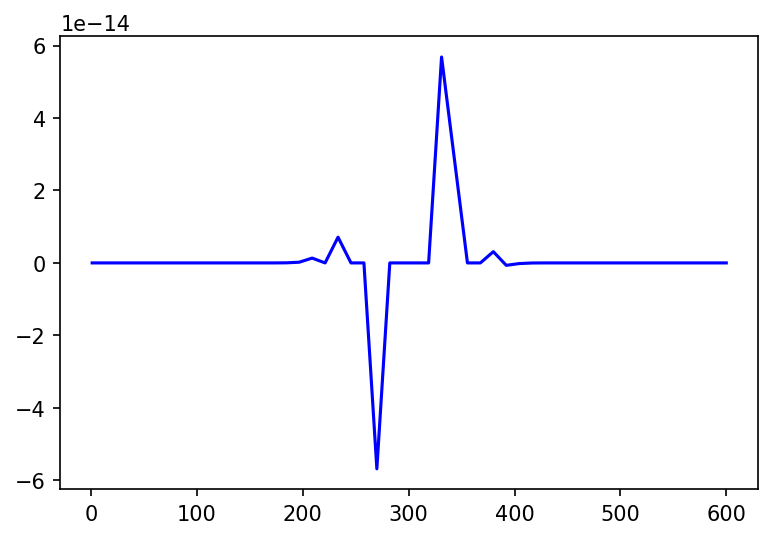

In [29]:
# Calculate and plot the residuals
res = y_array - gaussian(x_data, *pars)
plt.plot(x_data, res,color='b')

In [9]:
# linearly spaced x-axis of 10 values between 1 and 10
x_array = np.linspace(1,100,50)

amp1 = 100
sigma1 = 10
cen1 = 50
y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

# creating some noise to add the the y-axis data
y_noise_gauss = (np.exp((np.random.ranf(50))))/5
y_array_gauss += y_noise_gauss

print(np.min(y_array_gauss))
print(np.max(y_array_gauss))

0.21432776541225076
4.207839464071969


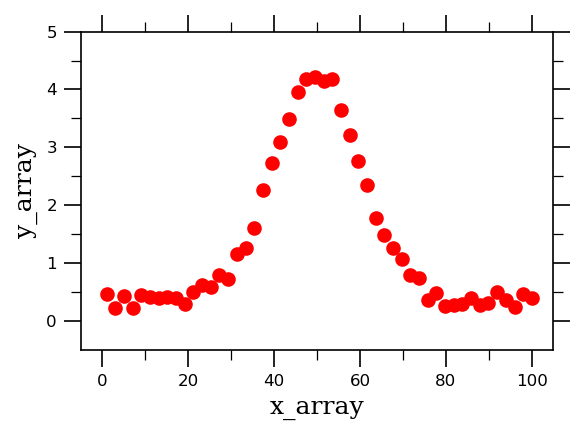

In [10]:

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)

In [5]:
# HTTP request for data 1

df = pd.read_csv('flake2-3_50x_514nm_10p_10s5x.csv')
x = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   478.096619
1     1.699705   583.277893
2     1.699770   549.715881
3     1.699834   497.048248
4     1.699899   707.215393
...        ...          ...
4978  2.199091  2129.633301
4979  2.199239  2144.026611
4980  2.199385  2046.700073
4981  2.199533  2046.350098
4982  2.199680  2102.892090

[4983 rows x 2 columns]


In [6]:
WN1 = x[:,0]
I1 = x[:,1]

print(WN)

[1.69964  1.699705 1.69977  ... 2.199385 2.199533 2.19968 ]


Text(0.5, 1.0, 'MoS2')

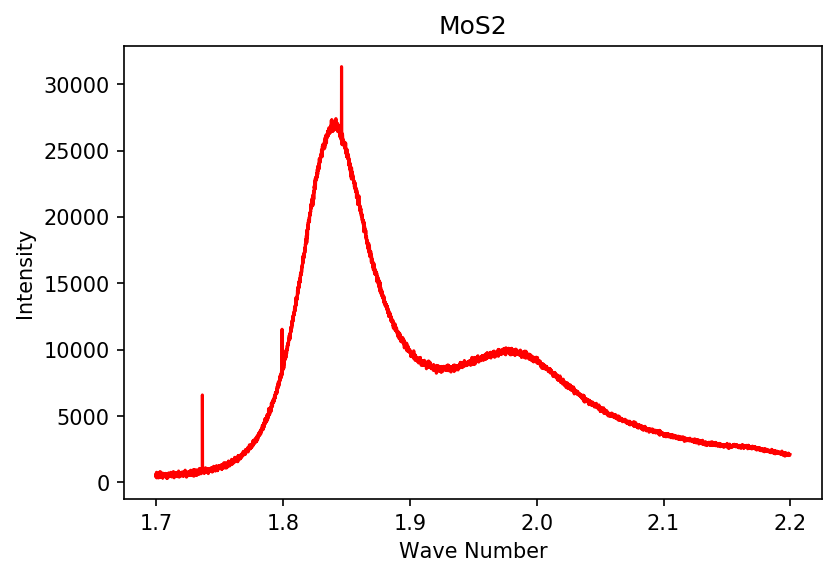

In [7]:
plt.plot(WN1,I1)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

In [8]:
# HTTP request for data 1

df = pd.read_csv('flake2-4_50x_514nm_10p_10s5x.csv')
z = np.array(df)
print(df)

          Wave    Intensity
0     1.699640   401.601166
1     1.699705   807.983276
2     1.699770   482.793945
3     1.699834   583.075867
4     1.699899   492.183685
...        ...          ...
4978  2.199091  2022.097412
4979  2.199239  1947.965210
4980  2.199385  2023.513916
4981  2.199533  2033.705322
4982  2.199680  2046.000244

[4983 rows x 2 columns]


In [9]:
WN2 = x[:,0]
I2 = x[:,1]

print(WN2)

[1.69964  1.699705 1.69977  ... 2.199385 2.199533 2.19968 ]


Text(0.5, 1.0, 'MoS2')

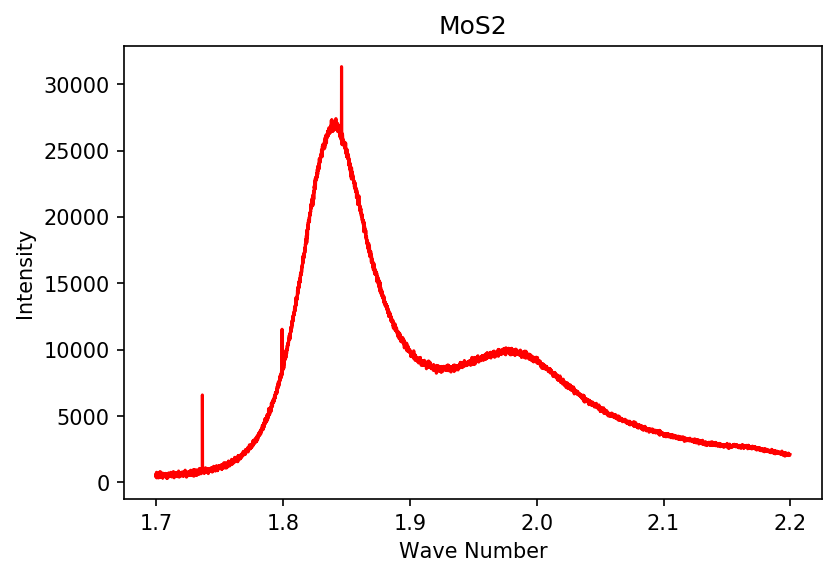

In [10]:
plt.plot(WN2,I2)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('MoS2')

In [19]:
import matplotlib.pyplot as plt

In [61]:
#import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

Wave_Numb = np.array([WN])
Intensity = np.array([I]) 

x_data = T
y_data = CC

#Sigma_n = Covariance matrix
sigma_0 = .5   #Initial uncertainty 
sigma_W = .05 #Initial noise variance 
length_scale = 50 #Initial length scale guess
f_0 = 0 # inital mean

# squared exponential kernel
kernel = sigma_0**2*RBF(length_scale, length_scale_bounds = (50,1e4))

# normalized y confirms mean is = zero

model = GaussianProcessRegressor(kernel = kernel, alpha = sigma_W, normalize_y = True)

# x - sigma values that will be calculated
x_test = np.linspace(1, 3, 4000)

model.fit(x_data, y_data,)

y_test, err = model.predict(x_test[:, np.newaxis]#, return_std = True)

print(np.max(y_data))

plt.scatter(x_test, y_test, label = 'New Data')
plt.scatter(x_data,y_data, label='Data')
plt.fill_between(x_test, y_test +err, y_test - err, alpha = .3)
plt.xlabel('Wave Number')
plt.ylabel('Intensity')
plt.title('Gaussian Process Raw Data Fit')
plt.legend()
plt.show()  

SyntaxError: invalid syntax (<ipython-input-61-bc7d45e2e644>, line 31)